In [4]:
# pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [1]:
from google_play_scraper import reviews, Sort

result, _ = reviews(
    'com.mathpresso.qanda',  # 콴다 앱의 패키지명
    lang='ko',  # 한국어 리뷰 가져오기
    country='kr',  # 한국 스토어 기준
    sort=Sort.NEWEST,  # 최신순 정렬
    count=100  # 가져올 리뷰 수
)

print(result[:5])  # 처음 5개 리뷰 출력


[{'reviewId': '992108db-2949-4469-8c45-653194988291', 'userName': '임호준', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocI5oMO6W9kPEsEzRVti3Jc-7F966fAnp9K4-Q7xiEhkIDbCnw=mo', 'content': '7일 무료 혜택 있는거 맞아요???', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2025, 2, 23, 0, 0, 28), 'replyContent': None, 'repliedAt': None, 'appVersion': None}, {'reviewId': '2da0544d-4308-421f-8ffc-5667b0130bc9', 'userName': ':', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUj2HP7H1vdJWEr4zRW0GyoFhG6GxR7RalwwNt-R8ZpKYtkLtq_', 'content': '제발 이상한 광고 좀 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고가 나옵니다. 스카나 학교에서 민망해지네요. 광고가 긴 것은 괜찮은데 무슨 광고가 일본 오타쿠애니광고만 계속 나오니까 진짜 민망하고 화가 납니다. 너무하네요 진짜 아무리 돈 벌고싶어도 애들 공부하는 앱에 이런광고 내보내면서 돈벌고싶나요', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '6.2.05', 'at': datetime.datetime(2025, 2, 22, 21, 48, 21), 'replyContent': None, 'repliedAt': None, 'appVersion': '6.2.05'}, {'reviewId': 'bac531c0-7aeb-4dbd-a763-4b22ab9fd0d

In [2]:
from google_play_scraper import reviews, Sort
import pandas as pd

In [3]:
def fetch_playstore_reviews(app_id, lang='ko', country='kr', num_reviews=500):
    all_reviews = []
    count = 100  # 한 번에 가져올 리뷰 수
    for _ in range((num_reviews // count) + 1):
        result, _ = reviews(
            app_id,
            lang=lang,
            country=country,
            sort=Sort.NEWEST,
            count=count
        )
        all_reviews.extend(result)
        if len(result) < count:
            break
    return pd.DataFrame(all_reviews[:num_reviews])

# 예시: 콴다 앱의 리뷰 수집
qanda_reviews = fetch_playstore_reviews('com.mathpresso.qanda')

In [4]:
qanda_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,992108db-2949-4469-8c45-653194988291,임호준,https://play-lh.googleusercontent.com/a/ACg8oc...,7일 무료 혜택 있는거 맞아요???,1,0,None,2025-02-23 00:00:28,None,NaT,None
1,2da0544d-4308-421f-8ffc-5667b0130bc9,:,https://play-lh.googleusercontent.com/a-/ALV-U...,제발 이상한 광고 좀 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고...,1,0,6.2.05,2025-02-22 21:48:21,None,NaT,6.2.05
2,bac531c0-7aeb-4dbd-a763-4b22ab9fd0d6,이영심,https://play-lh.googleusercontent.com/a/ACg8oc...,괜찮긴 한데 답이 다 틀리네요;;ㅎ,4,0,None,2025-02-22 18:45:56,None,NaT,None
3,09a4ec61-f238-4537-af63-d37abaa43e44,백근영,https://play-lh.googleusercontent.com/a-/ALV-U...,아니 광고가 나온다 치더라도 너무 길잖아요... 아니 5초 뒤에 나갈 수 있게라도 ...,1,0,None,2025-02-22 16:15:14,None,NaT,None
4,10ca59dd-39d7-4ffb-9feb-529bd59d8e90,이현민,https://play-lh.googleusercontent.com/a-/ALV-U...,광고시간이 너무 많이 늘어나서 비효율적,1,0,6.2.05,2025-02-22 14:59:39,None,NaT,6.2.05
...,...,...,...,...,...,...,...,...,...,...,...
495,9f52eb3d-7aab-4ee3-bb91-d957622a7518,2 1,https://play-lh.googleusercontent.com/a/ACg8oc...,나같으면 학생들 공부 열심히 하라고 광고 안넣을듯,2,0,None,2025-01-20 20:45:01,안녕하세요. 콴다 팀입니다. 많은 광고 노출로 인해 불편하셨을텐데 소중한 시간을 내...,2025-01-20 21:29:37,None
496,ee86d8b6-2cac-498f-920f-78d0d91254bb,행운의비둘기구구,https://play-lh.googleusercontent.com/a-/ALV-U...,왜 계속 광고에 도박광고가 뜨죠,1,0,6.2.00,2025-01-20 14:28:50,안녕하세요. 콴다 팀입니다.\n소중한 시간을 내어 리뷰 남겨주셔서 감사드립니다. 부...,2025-01-20 21:29:18,6.2.00
497,e77cde50-5d3e-41a8-bb29-3398e0362511,axxn77,https://play-lh.googleusercontent.com/a/ACg8oc...,전에는 광고도 적게 나와서 좋았는데 이제는 찍을 때 마다 나와요. 공부하라고 만든 ...,1,0,None,2025-01-20 09:24:42,안녕하세요. 콴다 팀입니다. 앱 내 광고 때문에 많이 답답하셨을 것 같아요. 콴다 ...,2025-01-20 21:28:50,None
498,372e85f6-1150-4d56-937c-a7edfb03dd49,최원준,https://play-lh.googleusercontent.com/a/ACg8oc...,계정 탈퇴하고 다시 회원 가입할려는데 같은 계정으로는 사용이 안돼서 따로 회원가입 ...,1,0,5.3.22,2025-01-20 04:16:18,안녕하세요 콴다 팀 입니다.\n먼저 콴다에 대한 소중한 리뷰를 남겨주셔서 감사합니다...,2025-01-20 21:28:29,5.3.22


In [5]:
df = pd.DataFrame(qanda_reviews)
df.to_csv('google_reviews.csv', index=False, encoding='utf-8-sig')

In [9]:
# pip install pandas konlpy wordcloud matplotlib nltk


   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.4 MB 4.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.6/19.4 MB 3.8 MB/s eta 0:00:05
   ---- ----------------------------------- 2.4/19.4 MB 3.9 MB/s eta 0:00:05
   ------- -------------------------------- 3.4/19.4 MB 4.0 MB/s eta 0:00:04
   -------- ------------------------------- 4.2/19.4 MB 4.0 MB/s eta 0:00:04
   ---------- ----------------------------- 5.0/19.4 MB 4.0 MB/s eta 0:00:04
   ----------- ---------------------------- 5.8/19.4 MB 4.0 MB/s eta 0:00:04
   ------------- -------------------------- 6.6/19.4 MB 4.0 MB/s eta 0:00:04
   --------------- ------------------------ 7.6/19.4 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 8.4/19.4 MB 4.0 MB/s eta 0:00:03
   ------------------ --------------------- 9.2/19.4 MB 4.0 MB/s eta 0:00:03
   --------------------- ------------------ 10.2/19.4 MB 4.1 MB/s eta 0:00:03
   -

In [21]:
# pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import konlpy
print(konlpy.__version__) # 설치 및 버전 확인 

0.6.0


In [9]:
import pandas as pd
import re
from collections import Counter
from konlpy.tag import Okt
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 🔹 1. 데이터 불러오기 (예제: 구글 플레이스토어 리뷰 데이터)
df = pd.read_csv('google_reviews.csv')  # CSV 파일을 불러옵니다.
df = df.dropna(subset=['content'])  # 'content' 열에서 결측치 제거

# 🔹 2. 한글 리뷰 전처리 함수
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # 특수문자 제거
    text = re.sub(r'\d+', '', text)   # 숫자 제거
    text = text.strip()
    return text

df['cleaned_content'] = df['content'].apply(clean_text)

# 🔹 3. 형태소 분석 및 명사 추출
okt = Okt()
df['nouns'] = df['cleaned_content'].apply(lambda x: okt.nouns(x))

# 🔹 4. 단어 빈도수 계산
all_words = [word for nouns in df['nouns'] for word in nouns]
word_counts = Counter(all_words)

# 불용어 제거 (예: 너무 흔한 단어 제거)
stopwords = ['이', '그', '저', '것', '때', '내', '수', '등', '있다', '하다', '좋다', '같다', '되다']
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords and len(word) > 1}

# 🔹 5. 가장 많이 등장하는 단어 20개 출력
top_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20]
print("🔹 상위 20개 키워드:")
for word, freq in top_words:
    print(f"{word}: {freq}")

🔹 상위 20개 키워드:
광고: 275
문제: 185
풀이: 145
결제: 140
공부: 90
프리미엄: 75
사용: 70
검색: 70
콴다: 60
그냥: 50
환불: 50
무료: 45
계속: 45
이해: 40
진짜: 35
다시: 35
수학: 35
유도: 35
유료: 30
학생: 30


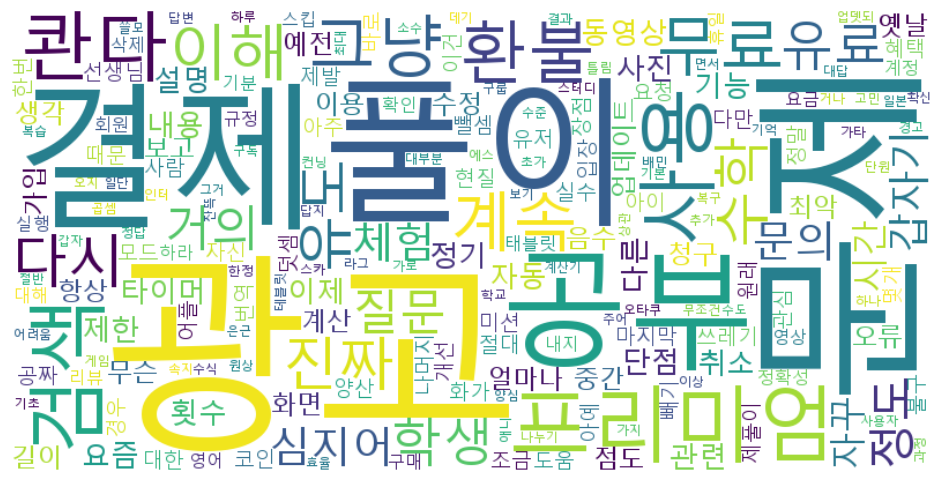

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Windows 폰트 경로 설정 (나눔고딕 또는 맑은고딕 중 하나 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로

# 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(filtered_words)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [11]:
# 문장 별 분석 

In [19]:
import pandas as pd
import re
from collections import Counter

# 🔹 1. 텍스트 정제 함수 (특수 문자, 공백 정리)
def clean_text(text):
    text = re.sub(r'\W+', ' ', str(text))  # 특수문자, 기호 제거
    return text.strip()

# 🔹 2. 불용어 리스트 정의
stopwords = ["이", "그", "저", "것", "때", "내", "수", "등", "있다", "하다", "좋다", 
             "같다", "되다", "너무", "좀", "에서", "에게", "그리고", "그러나", "하지만", 
             "그래서", "또한", "더욱", "때문에", "입니다", "입니다.", "정말", "매우", "아주"]

# 🔹 3. 불용어 제거 함수
def remove_stopwords(sentence):
    words = sentence.split()  # 공백 기준으로 단어 분리
    filtered_sentence = " ".join([word for word in words if word not in stopwords])
    return filtered_sentence

# 🔹 4. 데이터 정제 및 불용어 제거 적용
df['cleaned_content'] = df['content'].apply(clean_text)
df['filtered_content'] = df['cleaned_content'].apply(remove_stopwords)

# 🔹 5. 문장 빈도수 계산
sentence_counts = Counter(df['filtered_content'])

# 🔹 6. 상위 20개 문장 가져오기
top_sentences = sentence_counts.most_common(20)

# 🔹 7. 결과 데이터프레임 생성
sentence_df = pd.DataFrame(top_sentences, columns=['문장', '빈도'])

# 🔹 8. 결과 표시
sentence_df.head(10)

,문장,빈도
0,굿,10
1,좋아요,10
2,7일 무료 혜택 있는거 맞아요,5
3,제발 이상한 광고 안나오게 해주세요 공부하는 데 쓰이는 앱인데 자꾸 음란한 광고가 ...,5
4,괜찮긴 한데 답이 다 틀리네요 ㅎ,5
5,아니 광고가 나온다 치더라도 길잖아요 아니 5초 뒤에 나갈 있게라도 하던가 광고를 ...,5
6,광고시간이 많이 늘어나서 비효율적,5
7,광고개기네,5
8,광고가 많고 길어요,5
9,아니 광고가지고 뭐라 안 할려 했는 데ㅋㅋ 배민 15초짜리 광고 계속 틀어주는 건 ...,5


In [20]:
sentence_df.to_csv("sentence_analysis.csv", index=False, encoding="utf-8-sig")

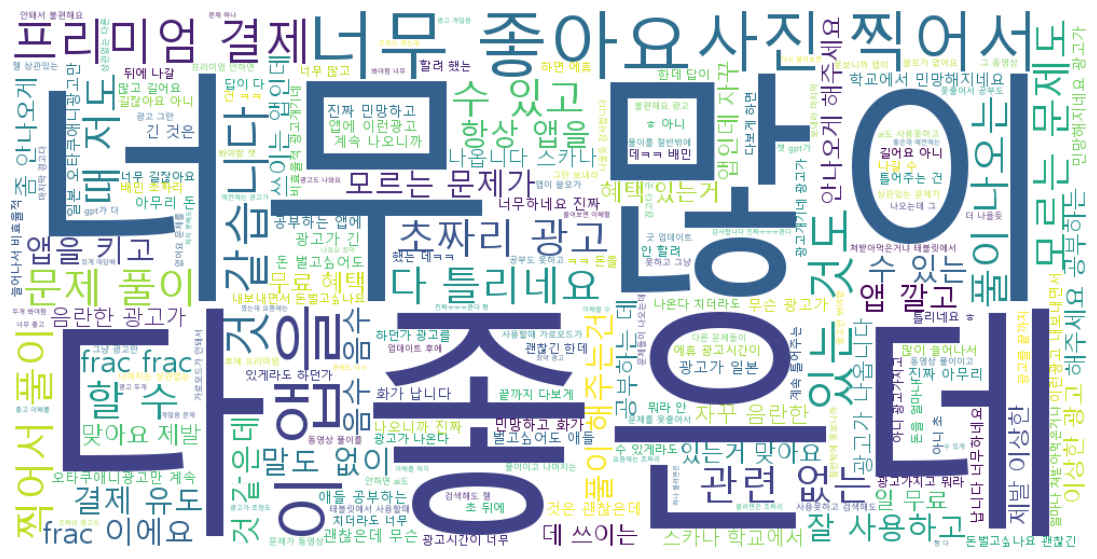

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 문장을 하나의 텍스트로 결합
text_data = " ".join(df['cleaned_content'])

# 워드 클라우드 생성 (문장 강조)
wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", background_color="white",
                      width=1000, height=500, collocations=True).generate(text_data)

# 워드 클라우드 시각화
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### 다시 새롭게 분석

In [21]:
from google_play_scraper import reviews, Sort
import pandas as pd

# 콴다 앱의 패키지명
app_id = 'com.mathpresso.qanda'

# 리뷰 수집
result, _ = reviews(
    app_id,
    lang='ko',  # 한국어 리뷰
    country='kr',  # 한국 스토어
    sort=Sort.NEWEST,  # 최신순 정렬
    count=1000  # 수집할 리뷰 수
)

# 데이터프레임으로 변환
df = pd.DataFrame(result)

# 필요한 열만 선택
df = df[['userName', 'score', 'at', 'content']]

# CSV 파일로 저장
df.to_csv('qanda_reviews.csv', index=False, encoding='utf-8-sig')


In [22]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import re

# CSV 파일 불러오기
df = pd.read_csv('qanda_reviews.csv')

# 결측치 제거
df = df.dropna(subset=['content'])

# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)
    return text.strip()

# 전처리된 텍스트 열 추가
df['cleaned_content'] = df['content'].apply(clean_text)

# 형태소 분석기
okt = Okt()

# 명사 추출
df['nouns'] = df['cleaned_content'].apply(lambda x: okt.nouns(x))

# 모든 명사 리스트
all_nouns = [noun for nouns in df['nouns'] for noun in nouns]

# 단어 빈도수 계산
word_counts = Counter(all_nouns)

# 불용어 제거
stopwords = ['이', '그', '저', '것', '때', '내', '수', '등', '있다', '하다', '좋다', '같다', '되다']
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords and len(word) > 1}

# 상위 20개 키워드
top_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20]

# 데이터프레임 생성
keywords_df = pd.DataFrame(top_words, columns=['단어', '빈도'])

# 결과 출력
print(keywords_df)


      단어   빈도
0     문제  468
1     광고  377
2     풀이  170
3     검색  122
4     콴다  120
5     결제  113
6     공부   95
7   프리미엄   88
8     진짜   85
9     사용   70
10    질문   61
11    오류   51
12    계속   50
13  업데이트   49
14    그냥   49
15    다시   45
16   선생님   45
17    기능   45
18    학생   45
19    무료   44


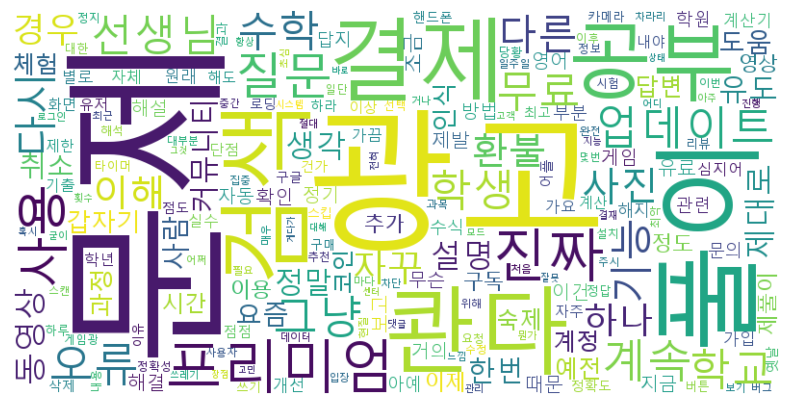

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # Windows의 경우
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(filtered_words)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 감정분석

In [24]:
# 감정 분석 수행 (긍정/부정 판별)
sentiments = []

for review in df["content"][:50]:
    review = str(review)
    if any(word in review for word in ["좋아요", "감사합니다", "최고", "굿", "도움", "쉽게", "이해", "조아용"]):
        sentiments.append("긍정")
    elif any(word in review for word in ["광고", "불편", "최악", "환불", "싫다", "돈", "틀리", "비효율", "속지마", "유료"]):
        sentiments.append("부정")
    else:
        sentiments.append("중립")

# 결과 출력
result_df = pd.DataFrame({"리뷰 내용": df["content"][:50], "감정 분석 결과": sentiments})
import ace_tools as tools
tools.display_dataframe_to_user(name="감정 분석 결과", dataframe=result_df)


ModuleNotFoundError: No module named 'ace_tools'